In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import neighbors

In [3]:
data = pd.read_csv("books.csv",error_bad_lines = False)
data.head()

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [5]:
data.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [6]:
data.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

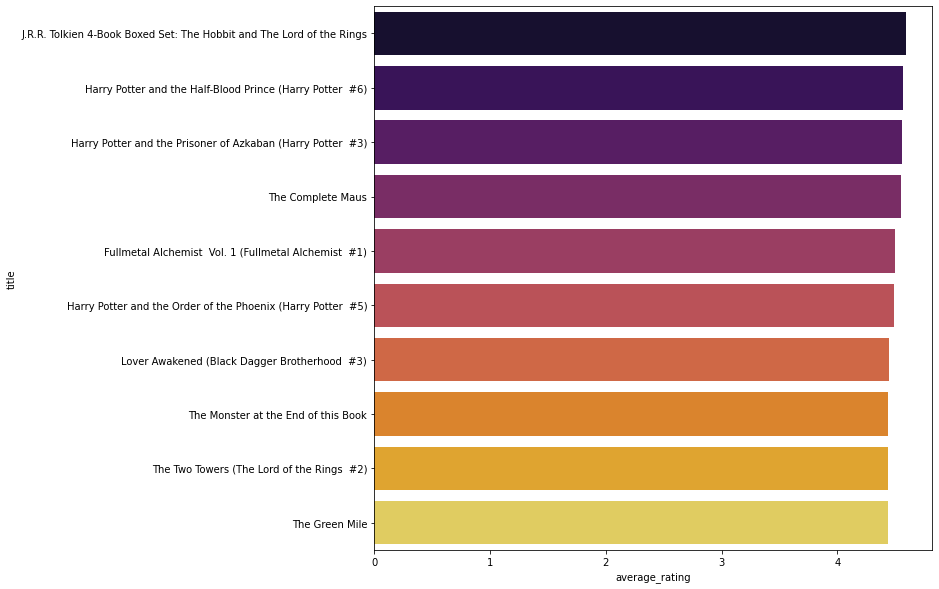

In [7]:
best = data[data['ratings_count']>100000]
best = best.sort_values(by  = 'average_rating', ascending = False)
plt.figure(figsize=(10, 10))
sns.barplot(y=best[:10]['title'], x = best[:10]['average_rating'],palette='inferno')

In [8]:
data['authors'].value_counts()

Stephen King                            40
P.G. Wodehouse                          40
Rumiko Takahashi                        39
Orson Scott Card                        35
Agatha Christie                         33
                                        ..
Aleksandr Solzhenitsyn/H.T. Willetts     1
Helen L. Taylor/John Bunyan              1
Stephen P. Maran                         1
Eleanor Clymer/Ursula Koering            1
Allegra Goodman                          1
Name: authors, Length: 6639, dtype: int64

In [9]:
data.groupby('authors')['title'].count().reset_index().sort_values(by ='title', ascending = False).head(10)

,authors,title
5786,Stephen King,40
4747,P.G. Wodehouse,40
5470,Rumiko Takahashi,39
4711,Orson Scott Card,35
46,Agatha Christie,33
4987,Piers Anthony,30
4305,Mercedes Lackey,29
5528,Sandra Brown,29
1401,Dick Francis,28
3695,Laurell K. Hamilton,23


In [10]:
data['language_code'].value_counts()

eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
lat         3
enm         3
swe         2
rus         2
glg         1
msa         1
ale         1
gla         1
srp         1
tur         1
nor         1
wel         1
nl          1
ara         1
Name: language_code, dtype: int64

In [11]:
data.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [12]:
data = data.drop(columns=['isbn13'], axis= 1)

In [13]:
final = pd.concat([data['average_rating'],data['ratings_count'],data['text_reviews_count']], axis=1)

In [14]:
final.head()

,average_rating,ratings_count,text_reviews_count
0,4.57,2095690,27591
1,4.49,2153167,29221
2,4.42,6333,244
3,4.56,2339585,36325
4,4.78,41428,164


In [15]:
data['title'].unique()

array(['Harry Potter and the Half-Blood Prince (Harry Potter  #6)',
       'Harry Potter and the Order of the Phoenix (Harry Potter  #5)',
       'Harry Potter and the Chamber of Secrets (Harry Potter  #2)', ...,
       'The Ice-Shirt (Seven Dreams #1)', 'Poor People',
       'Las aventuras de Tom Sawyer'], dtype=object)

In [16]:
final.loc[data[data['title'] == "Harry Potter and the Half-Blood Prince (Harry Potter  #6)"].index[0]]

average_rating              4.57
ratings_count         2095690.00
text_reviews_count      27591.00
Name: 0, dtype: float64

In [17]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
final = min_max_scaler.fit_transform(final)

In [18]:
nei = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
nei.fit(final)
_ , ids = nei.kneighbors(final)

In [19]:
ids[0]

array([   0,    1, 4415,    3, 1697, 2114], dtype=int64)

In [24]:
def search(name):
    lis = ids[data[data['title'] == name].index[0]]
    recommendations = [] 
    for i in lis:
        recommendations.append(data.loc[i].title)
    return recommendations

In [25]:
search("Harry Potter and the Half-Blood Prince (Harry Potter  #6)")

['Harry Potter and the Half-Blood Prince (Harry Potter  #6)',
 'Harry Potter and the Order of the Phoenix (Harry Potter  #5)',
 'Harry Potter and the Chamber of Secrets (Harry Potter  #2)',
 'Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)',
 'The Hobbit  or There and Back Again',
 'Animal Farm']

In [30]:
from flask import Flask, request, render_template, jsonify

app = Flask(__name__)

@app.route('/')
def my_form():
    return render_template('web.html')

@app.route('/', methods=['POST'])
def my_form_post():
    text = request.form['text']
    l = search(text)
    return render_template('in_order.html', your_list=l)
if __name__ == "__main__":
    app.run(debug=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [15/Nov/2021 09:39:53] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [15/Nov/2021 09:39:58] "POST / HTTP/1.1" 200 -
